<a href="https://colab.research.google.com/github/EnFiore/Master-AI/blob/main/Fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtro per Fake News
Il problema delle fake news è cresciuto esponenzialmente nell'ultimo decennio a causa della crescente diffusione dei social network, il governo degli Stati Uniti ha deciso di muoversi a tal proposito, incaricando la tua azienda di realizzare un plug-in per chrome in grado di riconoscere se una notizia è falsa. Il tuo compito è quello di realizzare il modello in grado di riconoscere le notizie false, che poi il team di machine learning enginner e web developer metterà in produzione. Ti vengono messi a disposizioni due raccolte di notizie, una contenente solo notizie false e l'altra contenente solo notizie vere, utilizzale per addestrare il tuo modello.

### [Link al dataset](https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip)

Parti da un'accurata analisi, rispondendo a domande come:
- le fake news sono più frequenti in una determinata categoria?
- per ogni categoria, ci sono argomenti che sono più soggetti alle fake news?
- I titoli delle fake news presentano dei pattern?

Una volta addestrato il modello esportalo [utilizzando pickle](https://scikit-learn.org/stable/model_persistence.html) così che i tuoi colleghi possano metterlo in produzione.

## Importiamo i dataset

In [ ]:
!wget https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
!unzip fake_news.zip

--2024-07-18 14:54:08--  https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 16.12.18.10, 3.5.224.12
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|16.12.18.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42975911 (41M) [application/zip]
Saving to: ‘fake_news.zip.4’

fake_news.zip.4     100%[===================>]  40.98M  17.6MB/s    in 2.3s    

2024-07-18 14:54:11 (17.6 MB/s) - ‘fake_news.zip.4’ saved [42975911/42975911]

Archive:  fake_news.zip
replace Fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df_true = pd.read_csv("True.csv")
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# ANALISI DATI

## CONTROLLO VALORI NULL

In [ ]:
#controllo eventuali valori nulli
df_fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
df_true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
print(df_fake['subject'].unique()) #categorie presenti nelle fake news
print(df_true['subject'].unique()) #categorie presenti nelle true news

['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']
['politicsNews' 'worldnews']


## RIPARTIZIONE DELLE CATEGORIE DELLE NEWS

In [ ]:
#numero fake news per subject
df_fake['subject'].value_counts()


subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

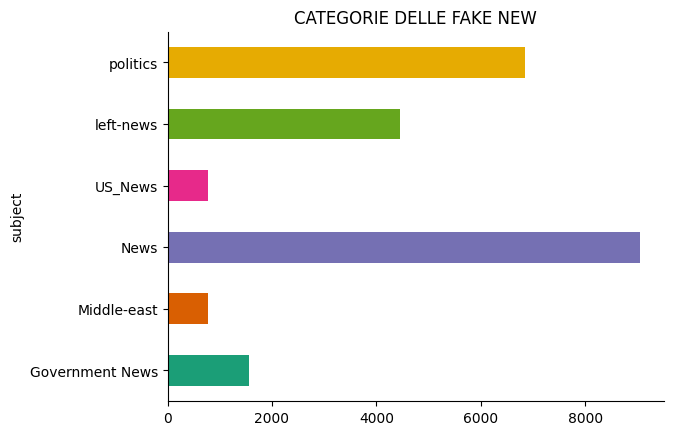

In [ ]:
df_fake.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), title='CATEGORIE DELLE FAKE NEW')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#numero true news per subject
df_true['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

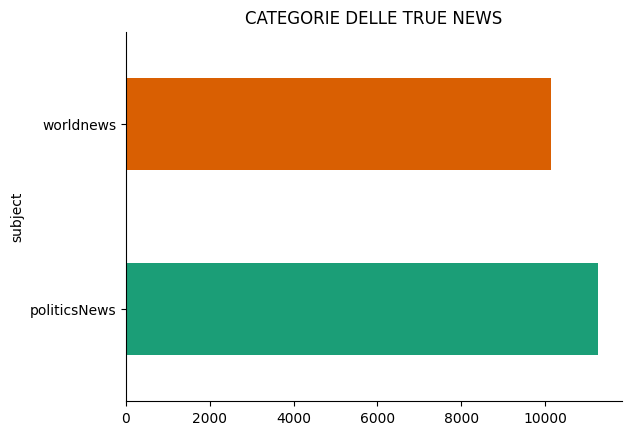

In [ ]:
df_true.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), title='CATEGORIE DELLE TRUE NEWS')
plt.gca().spines[['top', 'right',]].set_visible(False)

# ANALISI NEWS PER ANNO

In [ ]:
#print(df_fake["date"].unique())
#print(df_true["date"].unique())

In [ ]:
# creo colonna con il solo anno
df_fake["anno"] = df_fake["date"].str[-4:]
# elimino i valori nella colonna anno che non sono numerici
df_fake_anno = df_fake[pd.to_numeric(df_fake["anno"], errors='coerce').notnull()]

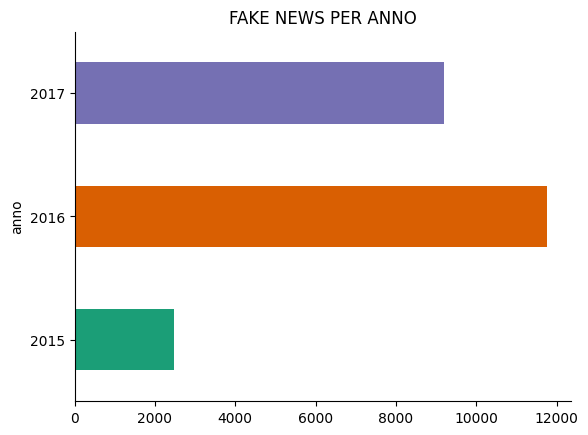

In [ ]:
df_fake_anno.groupby('anno').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'),title='FAKE NEWS PER ANNO')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# creo colonna con il solo anno
df_true["anno"] = df_true["date"].str[-5:]
# elimino i valori nella colonna anno che non sono numerici
df_true_anno = df_true[pd.to_numeric(df_true["anno"], errors='coerce').notnull()]

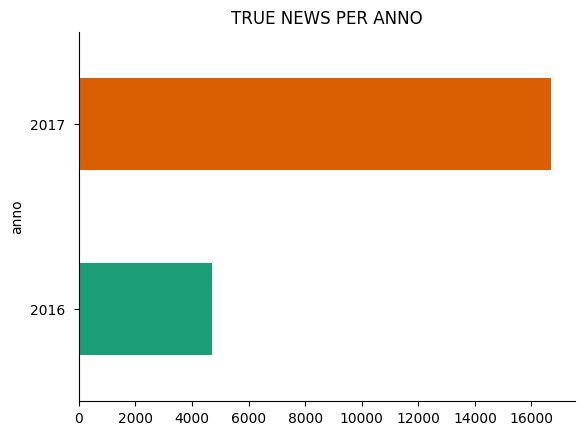

In [ ]:
df_true_anno.groupby('anno').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'),title='TRUE NEWS PER ANNO')
plt.gca().spines[['top', 'right',]].set_visible(False)

# RICONOSCIMENTO FAKE NEWS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [ ]:
df_true = df_true.assign(target=1)
df_fake = df_fake.assign(target=0)
df_total = pd.concat([df_true, df_fake])
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   anno     44898 non-null  object
 5   target   44898 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.4+ MB


In [ ]:
df_total.head()

,title,text,subject,date,anno,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",2017,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",2017,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2017,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2017,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",2017,1


In [ ]:
def bow_count(dataset, count_vectorizer):
    if count_vectorizer == None:
        count_vectorizer = CountVectorizer()
        X = count_vectorizer.fit_transform(dataset)
    else:
        X = count_vectorizer.transform(dataset)

    return X.toarray(), count_vectorizer

In [ ]:
y = df_total['target']
X = df_total['title']

In [ ]:
# crea set di training e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#effettuo il Bag-Of-Word del testo e creo dizzionario
training_data_cleaned, txt_vectorizer = bow_count(X_train, None)
test_data_cleaned,txt_vectorizer = bow_count(X_test, txt_vectorizer)

In [ ]:
#training rete neurale
clf = MLPClassifier(activation='logistic',
                    hidden_layer_sizes=(100,),
                    max_iter=25,
                    solver='adam',
                    tol=0.005,
                    verbose=True)

clf.fit(training_data_cleaned, y_train)

Iteration 1, loss = 0.44586005
Iteration 2, loss = 0.16371696
Iteration 3, loss = 0.10280526
Iteration 4, loss = 0.07697125
Iteration 5, loss = 0.06120840
Iteration 6, loss = 0.05043731
Iteration 7, loss = 0.04238961
Iteration 8, loss = 0.03621282
Iteration 9, loss = 0.03134212
Iteration 10, loss = 0.02743441
Iteration 11, loss = 0.02418592
Iteration 12, loss = 0.02156226
Iteration 13, loss = 0.01933126
Iteration 14, loss = 0.01746834
Iteration 15, loss = 0.01592854
Iteration 16, loss = 0.01449952
Iteration 17, loss = 0.01330904
Iteration 18, loss = 0.01230984
Iteration 19, loss = 0.01137728
Training loss did not improve more than tol=0.005000 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', max_iter=50, tol=0.005, verbose=True)

In [ ]:
clf.score(test_data_cleaned, y_test)

0.9657015590200445

#ESPORTAZIONE DEL MODELLO

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
